In [1]:
import pocketpartition as pp
import random

In [2]:
def generate_subset(frobenius_number):
    genus = random.choice(list(range(1, frobenius_number + 1)))
    subset = random.sample(list(range(1, frobenius_number + 1)), genus)
    subset.append(frobenius_number)
    return subset

In [3]:
def random_semigroup(frobenius_number):
    subset = generate_subset(frobenius_number)
    return pp.NumericalSet(subset).atom_monoid()

In [4]:
lst = [random_semigroup(50) for i in range(20000)]
semigroups = [i for n, i in enumerate(lst) if i not in lst[:n]]
semigroups;

In [5]:
total = len(lst)
results = []

for i in semigroups:
    percentage = lst.count(i) / total
    results.append((i, percentage))

# Sort results by percentage in descending order
results.sort(key=lambda x: x[1], reverse=True)

# Print the results
for i, percentage in results:
    print(i, percentage)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50} 0.5075
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50} 0.06965
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50} 0.0487
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50} 0.03105
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50} 0.01925
{1, 2, 3, 4, 5, 6,

In [6]:
total = len(lst)
results = {}

for S in semigroups:
    genus = len(S)
    percentage = lst.count(S) / total
    if genus in results:
        results[genus] += percentage
    else:
        results[genus] = percentage

# Convert dictionary to list of tuples and sort by percentage in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Print the results
for genus, percentage in sorted_results:
    print(genus, percentage)

50 0.5075
49 0.25685
48 0.12499999999999975
47 0.06020000000000045
46 0.029200000000000236
45 0.011199999999999965
44 0.005849999999999992
43 0.0027500000000000007
42 0.0008500000000000003
41 0.0004000000000000001
40 0.00015000000000000001
36 5e-05


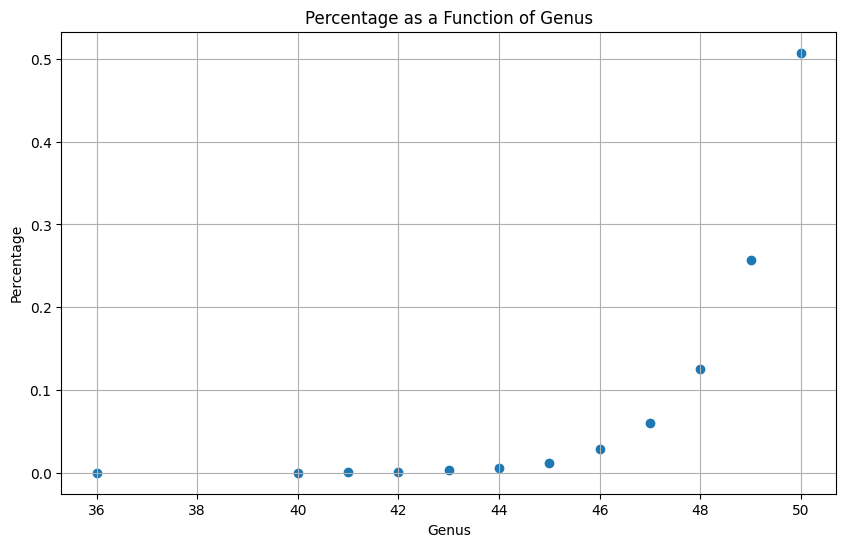

In [7]:
import matplotlib.pyplot as plt

total = len(lst)
results = {}

for S in semigroups:
    genus = len(S)
    percentage = lst.count(S) / total
    if genus in results:
        results[genus] += percentage
    else:
        results[genus] = percentage

# Convert dictionary to lists for plotting
genus_list = list(results.keys())
percentage_list = list(results.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(genus_list, percentage_list)
plt.xlabel('Genus')
plt.ylabel('Percentage')
plt.title('Percentage as a Function of Genus')
plt.grid(True)
plt.show()



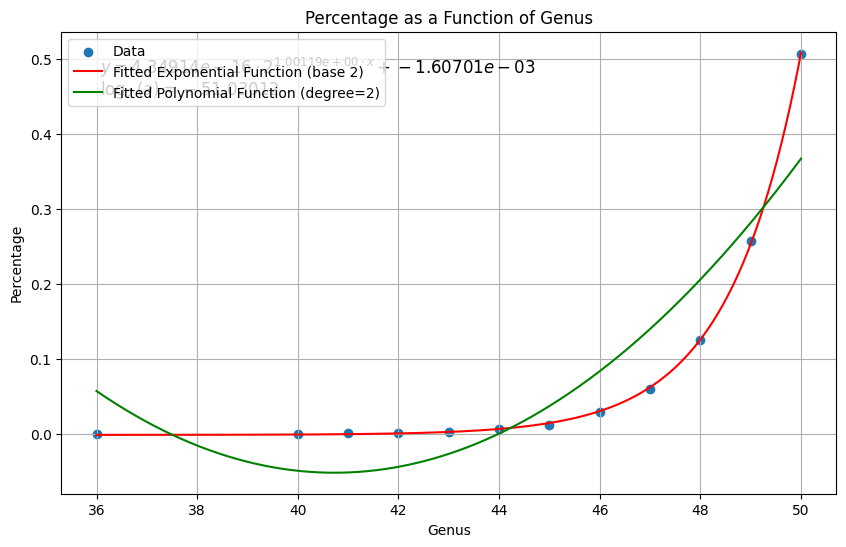

Fitted exponential parameters: a = 4.34914e-16, b = 1.00119e+00, c = -1.60701e-03
log2(a) = -51.03012
Fitted polynomial coefficients: [ 4.87904557e-03 -3.97427800e-01  8.04112366e+00]
R-squared for exponential fit: 0.99987
R-squared for polynomial fit: 0.81522


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data
total = len(lst)
results = {}

for S in semigroups:
    genus = len(S)
    percentage = lst.count(S) / total
    if genus in results:
        results[genus] += percentage
    else:
        results[genus] = percentage

genus_list = np.array(list(results.keys()))
percentage_list = np.array(list(results.values()))

# Define the base 2 exponential function
def exponential_function_base2(x, a, b, c):
    return a * (2 ** (b * x)) + c

# Fit the base 2 exponential function to the data
popt_exp, pcov_exp = curve_fit(exponential_function_base2, genus_list, percentage_list)

# Calculate log base 2 of a
log2_a = np.log2(popt_exp[0])

# Fit a polynomial to the data
degree = 2  # Change this to try different degrees
popt_poly = np.polyfit(genus_list, percentage_list, degree)
poly_function = np.poly1d(popt_poly)

# Generate x values for plotting
x_values = np.linspace(min(genus_list), max(genus_list), 1000)
fitted_curve_exp = exponential_function_base2(x_values, *popt_exp)
fitted_curve_poly = poly_function(x_values)

# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Calculate R-squared for exponential fit
fitted_values_exp = exponential_function_base2(genus_list, *popt_exp)
r2_exp = calculate_r_squared(percentage_list, fitted_values_exp)

# Calculate R-squared for polynomial fit
fitted_values_poly = poly_function(genus_list)
r2_poly = calculate_r_squared(percentage_list, fitted_values_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(genus_list, percentage_list, label='Data')
plt.plot(x_values, fitted_curve_exp, color='red', label='Fitted Exponential Function (base 2)')
plt.plot(x_values, fitted_curve_poly, color='green', label=f'Fitted Polynomial Function (degree={degree})')
plt.xlabel('Genus')
plt.ylabel('Percentage')
plt.title('Percentage as a Function of Genus')
plt.legend()
plt.grid(True)

# Display the exponential equation and log2(a) on the plot
equation_text_exp = r'$y = {:.5e} \cdot 2^{{ {:.5e} \cdot x }} + {:.5e}$'.format(*popt_exp)
log2_a_text = r'$\log_2(a) = {:.5f}$'.format(log2_a)
plt.text(0.05, 0.95, equation_text_exp, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, log2_a_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

# Print the parameters of the fitted exponential function and log2(a)
print("Fitted exponential parameters: a = {:.5e}, b = {:.5e}, c = {:.5e}".format(*popt_exp))
print("log2(a) = {:.5f}".format(log2_a))
print("Fitted polynomial coefficients:", popt_poly)

# Print R-squared values
print(f"R-squared for exponential fit: {r2_exp:.5f}")
print(f"R-squared for polynomial fit: {r2_poly:.5f}")


In [9]:
partitions = [pp.NumericalSemigroup(S).partition() for S in semigroups]

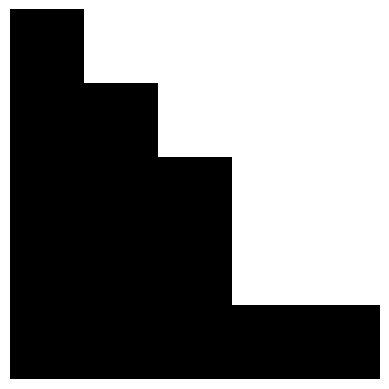

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def draw_ferrers_diagram(partition):
    """
    Draws the Ferrers diagram for a given partition using a grid of squares.

    Parameters:
    partition (list of int): The partition represented as a list of integers.
    """
    # Validate the partition
    if not all(isinstance(x, int) and x > 0 for x in partition):
        raise ValueError("Partition must be a list of positive integers.")
    if not all(partition[i] >= partition[i + 1] for i in range(len(partition) - 1)):
        raise ValueError("Partition must be in non-increasing order.")

    # Determine the size of the grid
    max_width = partition[0]
    height = len(partition)

    # Create a grid with 0s
    grid = np.zeros((height, max_width))

    # Fill the grid based on the partition
    for i, part in enumerate(partition):
        grid[i, :part] = 1

    # Flip the grid vertically
    grid = np.flipud(grid)

    # Plot the grid
    plt.imshow(grid, cmap='Greys', extent=[0, max_width, 0, height], aspect='equal')
    plt.axis('off')
    plt.show()

# Example usage
partition = [5, 3, 3, 2, 1]
partition
draw_ferrers_diagram(partition)

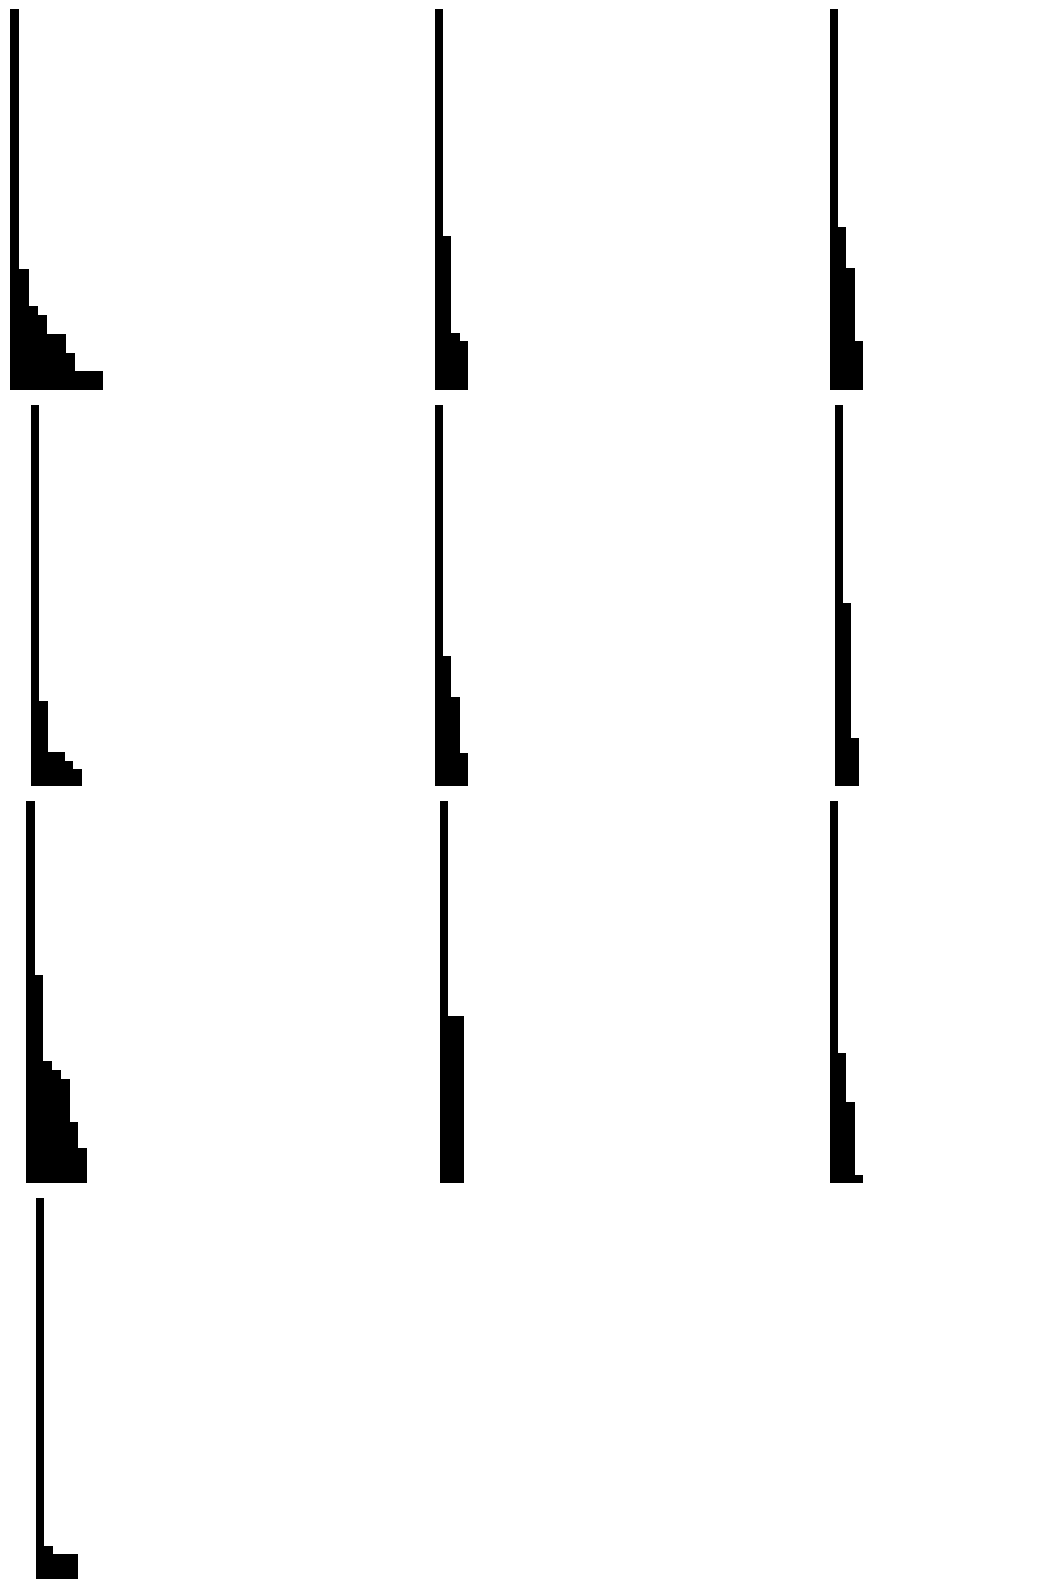

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def draw_ferrers_diagram(ax, partition):
    """
    Draws the Ferrers diagram for a given partition using a grid of squares on a specific subplot.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axis to draw the Ferrers diagram on.
    partition (list of int): The partition represented as a list of integers.
    """
    # Validate the partition
    if not all(isinstance(x, int) and x > 0 for x in partition):
        raise ValueError("Partition must be a list of positive integers.")
    #if not all(partition[i] <= partition[i + 1] for i in range(len(partition) - 1)):
    #    raise ValueError("Partition must be in non-increasing order.")

    # Determine the size of the grid
    max_width = partition[0]
    height = len(partition)

    # Create a grid with 0s
    grid = np.zeros((height, max_width))

    # Fill the grid based on the partition
    for i, part in enumerate(partition):
        grid[i, :part] = 1

    # Flip the grid vertically
    grid = np.flipud(grid)

    # Plot the grid on the given axis
    ax.imshow(grid, cmap='Greys', extent=[0, max_width, 0, height], aspect='equal')
    ax.axis('off')

def create_ferrers_collage(partitions, cols=3):
    """
    Creates a collage of Ferrers diagrams for a list of partitions.

    Parameters:
    partitions (list of list of int): A list of partitions.
    cols (int): Number of columns in the collage.
    """
    # Determine the number of rows needed
    num_partitions = len(partitions)
    rows = (num_partitions + cols - 1) // cols  # Ceiling division

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Draw each Ferrers diagram in the corresponding subplot
    for i, partition in enumerate(partitions):
        draw_ferrers_diagram(axes[i], partition)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage

create_ferrers_collage(partitions[1000:1010], cols=3)


In [12]:
len(partitions)

1446

In [23]:
def random_compare_size(frob):
    gaps = generate_subset(frob)
    T = pp.NumericalSet(gaps)
    nT = T.partition()
    atom_monoid_gaps = T.atom_monoid()
    S = pp.NumericalSemigroup(atom_monoid_gaps)
    nS = S.partition()
    return (gaps, atom_monoid_gaps, sum(nT), sum(nS))


In [45]:
from tqdm import tqdm
for g in tqdm(range(1, 50)):
    ex_g = []
    for i in range(10000):
        examples = []
        (T, S, nT, nS) = random_compare_size(g)
        if nS < nT < nS + 2:
            examples.append((T, S, nT, nS))
    if examples == []:
        # print("None Found")
        pass
    else:
        ex_g.append(examples)
        print(f"{len(examples)} examples found.")

100%|██████████| 49/49 [02:35<00:00,  3.18s/it]


In [59]:
from tqdm import tqdm
diff_g = {}
F = 500
for g in tqdm(range(1, F)):
    for i in range(1000):
        diff = []
        (T, S, nT, nS) = random_compare_size(g)
        diff.append(nT - nS)
    diff_g[g] = diff

100%|██████████| 499/499 [7:16:45<00:00, 52.52s/it]     


In [60]:
data = [(g + 1, sum(diff_g[g])/len(diff_g[g])) for g in range(1, F)]

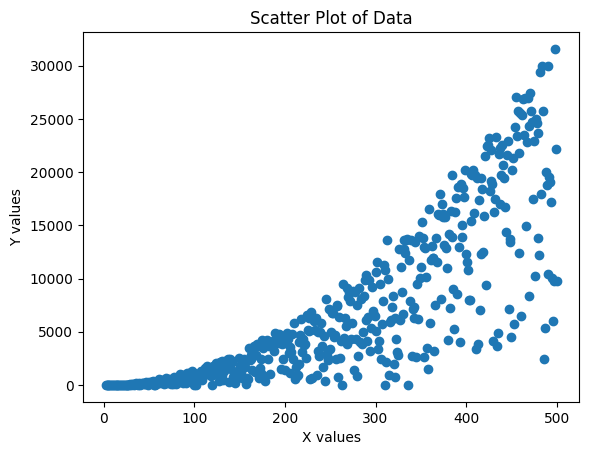

In [61]:
# Importing the necessary library
import matplotlib.pyplot as plt

# Unpacking the tuples into two lists, x and y, for plotting
x, y = zip(*data)

# Creating the scatter plot
plt.scatter(x, y)

# Adding title and labels
plt.title('Scatter Plot of Data')
plt.xlabel('X values')
plt.ylabel('Y values')

# Displaying the plot
plt.show()